In [1]:
import json
import os
import numpy as np
import h5py
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses2023/func_feature_Reet.json'
path_2 = '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses2023/lld_feature_Reet.json'

temp_1 = pd.read_json(path)
display(temp_1)
temp_2 = pd.read_json(path_2)
display(temp_2)

FileNotFoundError: ignored

In [ ]:
print(np.array([item for sublist in temp_1['0182023059_h_00.wav']['features'] for item in sublist]).shape)
# flat_list = [item for sublist in nested_list for item in sublist]

# print(flat_list)

(6373,)


In [2]:
root_path = '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/'
all_ses_paths = []
for i in range(1006, 6014):
  temp_path = root_path + f'ses{i}'
  if(os.path.isdir(temp_path)):
    all_ses_paths.append(temp_path)
print(all_ses_paths)

['/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1006', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1007', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1008', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1009', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1010', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1011', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1012', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1013', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1015', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1016', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1017', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1018', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1019', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1021', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1023', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1024', '/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1025', '/content/dri

In [3]:
# df_model = pd.DataFrame(columns=['features','label'])
X = list()

for p in all_ses_paths:
  print(p)
  for i in os.listdir(p):
    if os.path.isfile(os.path.join(p,i)) and 'func_feature' in i:
      file_path = os.path.join(p, i)
      temp_df = pd.read_json(file_path)
      for (_, columnData) in temp_df.items():
        temp_array = [item for sublist in columnData.features for item in sublist]
        temp_array = np.append(temp_array, columnData.label)
        # print(temp_array.shape)
        X.append(temp_array)
        # df_model.loc[len(df_model.index)] = [temp_array, columnData.label]

/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1006
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1007
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1008
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1009
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1010
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1011
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1012
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1013
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1015
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1016
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1017
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1018
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1019
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1021
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1023
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1024
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1025
/content/drive/MyDrive/CSE 493 ALC Audio/ALC 2/ses1026
/content/d

In [15]:
df_visualization = pd.DataFrame(X)

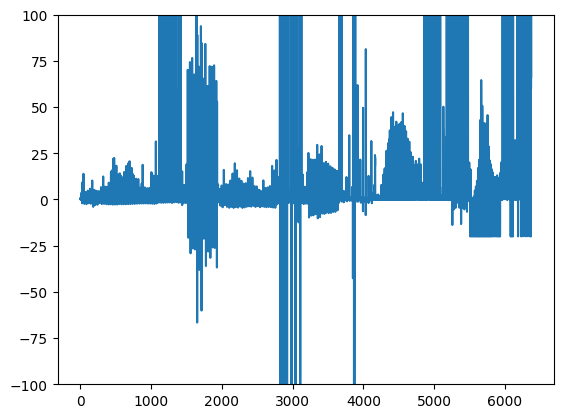

In [43]:
for i, row in df_visualization.iterrows():
  # print(row[:6373])
  plt.plot(range(6373), row[:6373])
  plt.ylim([-100, 100])
  plt.show()
  break


In [ ]:
features = df_visualization.iloc[:,:df_visualization.shape[1]-1].values

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import BatchNormalization, Activation
model = Sequential()
model.add(Conv1D(32, 32, padding='same', input_shape=(6373, 1)))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
model.add(AvgPool1D(5, 4))
model.add(Dropout(0.5))
model.add(Conv1D(64, 34, padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
model.add(AvgPool1D(5, 4))
model.add(Dropout(0.5))
model.add(Conv1D(128, 36, padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
model.add(AvgPool1D(5, 4))
model.add(Dropout(0.5))
model.add(Conv1D(256, 38, padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
model.add(AvgPool1D(5, 4))
model.add(Dropout(0.5))
model.add(Conv1D(512, 40, padding='same'))
model.add(BatchNormalization())
model.add(Activation(keras.activations.relu))
model.add(AvgPool1D(5, 4))
model.add(Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(Dense(2))
model.add(keras.layers.Softmax())

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_35 (Conv1D)          (None, 6373, 32)          1056      
                                                                 
 batch_normalization_35 (Ba  (None, 6373, 32)          128       
 tchNormalization)                                               
                                                                 
 activation_35 (Activation)  (None, 6373, 32)          0         
                                                                 
 average_pooling1d_35 (Aver  (None, 1593, 32)          0         
 agePooling1D)                                                   
                                                                 
 dropout_35 (Dropout)        (None, 1593, 32)          0         
                                                                 
 conv1d_36 (Conv1D)          (None, 1593, 64)         

In [45]:
df_model = pd.DataFrame(X)

In [50]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X_train, X_test = train_test_split(df_model, test_size=0.20, random_state=1)


In [51]:
print(X_train.shape)

(9901, 6374)


In [52]:
train_x = X_train.iloc[:,:X_train.shape[1]-1].values
train_x.reshape(len(train_x), train_x.shape[1],1)
train_y = X_train[X_train.shape[1]-1]
train_y=to_categorical(train_y)
print(np.shape(train_x), np.shape(train_y))

(9901, 6373) (9901, 2)


In [53]:
from keras.utils import to_categorical

# X_train = X_train.iloc[:,:].values
# print(X_train[1])
# y_train = to_categorical(y_train)
checkpoint_filepath = '/content/drive/MyDrive/CSE 493 ALC Audio/checkpoints/checkpoint.model.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath)

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(train_x, train_y, batch_size = 32, epochs=10, callbacks=[model_checkpoint_callback], verbose=1)

Epoch 1/10
310/310 [==============================] - 405s 1s/step - loss: 0.7397 - accuracy: 0.5818
Epoch 2/10
310/310 [==============================] - 405s 1s/step - loss: 0.6827 - accuracy: 0.6022
Epoch 3/10
310/310 [==============================] - 407s 1s/step - loss: 0.6735 - accuracy: 0.6106
Epoch 4/10
310/310 [==============================] - 422s 1s/step - loss: 0.6687 - accuracy: 0.6158
Epoch 5/10
310/310 [==============================] - 425s 1s/step - loss: 0.6678 - accuracy: 0.6176
Epoch 6/10
310/310 [==============================] - 431s 1s/step - loss: 0.6656 - accuracy: 0.6196
Epoch 7/10
310/310 [==============================] - 428s 1s/step - loss: 0.6660 - accuracy: 0.6181
Epoch 8/10
310/310 [==============================] - 432s 1s/step - loss: 0.6654 - accuracy: 0.6193
Epoch 9/10
310/310 [==============================] - 404s 1s/step - loss: 0.6653 - accuracy: 0.6193
Epoch 10/10
310/310 [==============================] - 423s 1s/step - loss: 0.6667 - accura

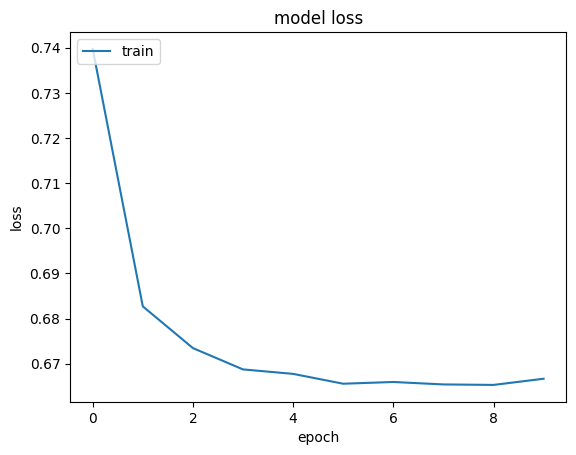

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
test_x = X_test.iloc[:,:X_test.shape[1]-1].values
test_x.reshape(len(test_x), test_x.shape[1],1)
test_y = X_test[X_test.shape[1]-1]
test_y = to_categorical(test_y)
print(np.shape(test_x), np.shape(test_y))

(2476, 6373) (2476, 2)


In [56]:
score = model.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

78/78 [==============================] - 31s 393ms/step - loss: 0.6700 - accuracy: 0.6050
Test Loss: 0.67000812292099
Test accuracy: 0.605008065700531
